<a href="https://colab.research.google.com/github/Epsita-R/Predictive-Analytics/blob/main/2348517_ETE_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn-extra

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn_extra.cluster import KMedoids  # For K-Medoids
import time  # For timing execution

# Step 1: Load the CSV into a pandas DataFrame
try:
    df = pd.read_csv("/content/OnlineRetail.csv", encoding="latin1", on_bad_lines="skip")
    print("Dataset loaded successfully.")

    # Display the first few rows
    print("\nDataset Preview:")
    print(df.head())
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Dataset loaded successfully.

Dataset Preview:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom  


In [13]:
# Step 2: Preprocess the data (Numerical Columns + Standardization)
try:
    # Select numerical columns for clustering
    data = df.select_dtypes(include=["float64", "int64"])
    print(f"\nSelected numerical columns for clustering: {list(data.columns)}")

    # Handle missing values (optional, depending on your data)
    data.fillna(data.mean(), inplace=True)

    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
except Exception as e:
    print(f"An error occurred during preprocessing: {e}")


Selected numerical columns for clustering: ['Quantity', 'UnitPrice', 'CustomerID']


In [14]:
# Step 3: K-Means Clustering
def kmeans_clustering(data, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, max_iter=300, init="k-means++")
    kmeans_labels = kmeans.fit_predict(data)

    # Evaluation metrics
    sil_score = silhouette_score(data, kmeans_labels)
    db_score = davies_bouldin_score(data, kmeans_labels)
    ch_score = calinski_harabasz_score(data, kmeans_labels)

    print("\nK-Means Clustering Evaluation Metrics:")
    print(f"Silhouette Score: {sil_score:.4f}")
    print(f"Davies-Bouldin Score: {db_score:.4f}")
    print(f"Calinski-Harabasz Index: {ch_score:.4f}")

    return kmeans, kmeans_labels

In [15]:
# Step 4: K-Medoids Clustering
def kmedoids_clustering(data, n_clusters=3):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=42, metric="euclidean")
    kmedoids_labels = kmedoids.fit_predict(data)

    # Evaluation metrics
    sil_score = silhouette_score(data, kmedoids_labels)
    db_score = davies_bouldin_score(data, kmedoids_labels)
    ch_score = calinski_harabasz_score(data, kmedoids_labels)

    print("\nK-Medoids Clustering Evaluation Metrics:")
    print(f"Silhouette Score: {sil_score:.4f}")
    print(f"Davies-Bouldin Score: {db_score:.4f}")
    print(f"Calinski-Harabasz Index: {ch_score:.4f}")

    return kmedoids, kmedoids_labels

In [17]:
# Main Execution
if __name__ == "__main__":
    n_clusters = 3

    # Test with a subset of the dataset
    data_sampled = data_scaled[:10000]

    # K-Means Clustering
    try:
        print("\nK-Means Clustering.")
        start_time = time.time()
        kmeans, kmeans_labels = kmeans_clustering(data_sampled, n_clusters)
        print(f"K-Means Execution Time: {time.time() - start_time:.2f} seconds")
    except Exception as e:
        print(f"An error occurred during K-Means clustering: {e}")

    # K-Medoids Clustering
    try:
        print("\Running K-Medoids Clustering.")
        start_time = time.time()
        kmedoids, kmedoids_labels = kmedoids_clustering(data_sampled, n_clusters)
        print(f"K-Medoids Execution Time: {time.time() - start_time:.2f} seconds")
    except Exception as e:
        print(f"An error occurred during K-Medoids clustering: {e}")



K-Means Clustering.

K-Means Clustering Evaluation Metrics:
Silhouette Score: 0.6713
Davies-Bouldin Score: 0.4053
Calinski-Harabasz Index: 13628.3315
K-Means Execution Time: 0.94 seconds
\Running K-Medoids Clustering.

K-Medoids Clustering Evaluation Metrics:
Silhouette Score: 0.6707
Davies-Bouldin Score: 0.3989
Calinski-Harabasz Index: 13570.9936
K-Medoids Execution Time: 3.54 seconds


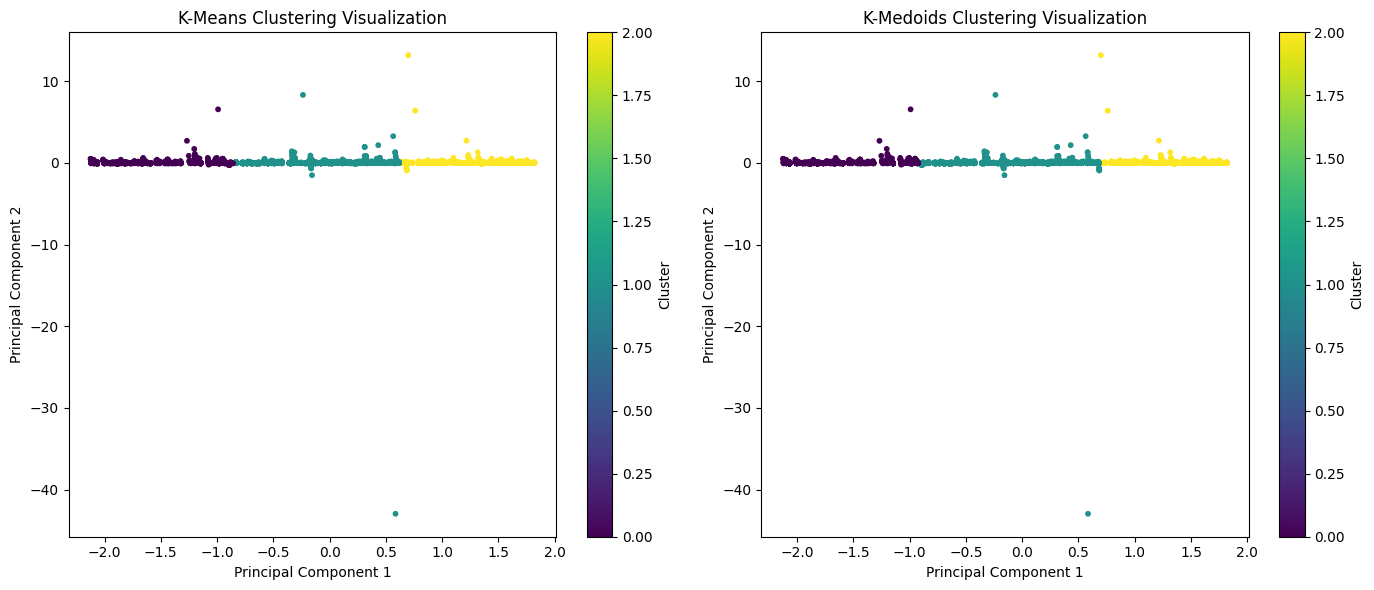

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

def visualize_clusters(data_scaled, labels_kmeans, labels_kmedoids):
    # Reduce dimensions using PCA on the sampled data instead of the entire data
    pca = PCA(n_components=2)
    # Assuming data_sampled was used to generate labels
    data_2d = pca.fit_transform(data_scaled[:10000])  # Apply PCA to the same subset

    # Plot K-Means clusters
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels_kmeans, cmap='viridis', s=10)
    plt.title("K-Means Clustering Visualization")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label="Cluster")

    # Plot K-Medoids clusters
    plt.subplot(1, 2, 2)
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels_kmedoids, cmap='viridis', s=10)
    plt.title("K-Medoids Clustering Visualization")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label="Cluster")

    plt.tight_layout()
    plt.show()

# Call the visualization function with labels
visualize_clusters(data_scaled, kmeans_labels, kmedoids_labels)

**Observations:**

Both K-Means and K-Medoids show similar patterns, which is expected since both methods optimize clustering but differ in their underlying algorithms.

The principal components have a wide range (e.g., -40 to 10 on the y-axis). This may be due to the standardized data or outliers in your dataset.